In [1]:
# import modules
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
import numpy as np
import copy
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter

In [2]:
# import datasets
speeches = pd.read_csv('Speeches.csv')

nltk.download('vader_lexicon')
stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lacto\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# some cleaning 
def clean_speech(speech):
    # function to apply some cleaning methods to the speeches
    # inputs: speech (str) - inaugural speech for a given president

    # outputs: speech_clean (str) - updated speech after some cleaning

    # remove new line characters
    speech = speech.replace('\n', '')

    # use a regex to fix some missing white spaces after punctuation marks
    speech_clean = re.sub(r'(?<=[,.;!?:])(?=[^\s])', ' ', speech)

    return speech_clean.lower()

speeches['Speech'] = speeches['Speech'].apply(clean_speech)

In [4]:
# get the sentiment scores for every speech
sia = SentimentIntensityAnalyzer()

speech_scores = {} # empty dictionary to hold the sentiment scores
i = 0 # simple index for keys, for now

for speech in speeches['Speech']: # want to score every speech

    speech_sent = nltk.tokenize.sent_tokenize(speech) # split by sentences

    scores = [] # temporary list to score sentence scores
    for sent in speech_sent:
        ss = sia.polarity_scores(sent) # get polarity scores
        scores.append(ss) # update list


    # unpack scores
    neg = [d['neg'] for d in scores] # negativity score
    neu = [d['neu'] for d in scores] # neutrality score
    pos = [d['pos'] for d in scores] # positivity score
    comp = [d['compound'] for d in scores] # 'compound' score

    # unpack scores and save to dictionary
    speech_dict = dict({
        'text' : speech_sent,
        'neg' : neg,
        'neu' : neu,
        'pos' : pos,
        'comp' : comp
    })

    # update the speech dictionary with all the scores 
    speech_scores.update({i : speech_dict}) 
    i += 1
    

In [5]:
# create a new dictionary to hold the filtered results
filtered_speech_scores = {}

for key, value in speech_scores.items():

    # get the comp list
    comp = value['comp']

    
    # create a list of indices where comp != 0.0
    non_zero_indices = [i for i, score in enumerate(comp) if score != 0.0]
    zero_indices = [i for i, score in enumerate(comp) if score == 0.0]

    new_values = {
        'comp': [comp[i] for i in non_zero_indices],
        'neg': [value['neg'][i] for i in non_zero_indices],
        'neu': [value['neu'][i] for i in non_zero_indices],
        'pos': [value['pos'][i] for i in non_zero_indices],
        'text': [value['text'][i] for i in non_zero_indices],
        'zero_comp_text': [value['text'][i] for i in zero_indices]  # sentences with comp == 0.0
        }

    filtered_speech_scores.update({key:new_values})

In [6]:
# calculate summary stats for each speech
word_tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+') # tokenizer for splitting sentences on words & removing punctuation

num_words = [len(word_tokenizer.tokenize(speech)) for speech in speeches['Speech']] # number of words in speech
num_sent = [len(filtered_speech_scores[key]['text']) for key in filtered_speech_scores.keys()] # number of sentences in speech
speech_mean = [np.round(np.mean(filtered_speech_scores[key]['comp']), 3) for key in filtered_speech_scores.keys()] # avg compound score for sentence in speech
speech_var = [np.round(np.std(filtered_speech_scores[key]['comp']), 3) for key in filtered_speech_scores.keys()] # standard dev of compond score for sentence in speech

speeches['num_words'] = pd.Series(num_words)
speeches['num_sent'] = pd.Series(num_sent)
speeches['mean_score'] = pd.Series(speech_mean)
speeches['dev_score'] = pd.Series(speech_var)

speeches

,Name,Inaugural Address,Date,Speech,num_words,num_sent,mean_score,dev_score
0,George Washington,First Inaugural Address,4/30/1789,fellow-citizens of the senate and of the house...,1431,21,0.634,0.446
1,George Washington,Second Inaugural Address,3/4/1793,fellow citizens: i am again called upon by the...,135,2,0.160,0.731
2,John Adams,Inaugural Address,3/4/1797,"when it was first perceived, in early times, t...",2322,34,0.479,0.517
3,Thomas Jefferson,First Inaugural Address,3/4/1801,"friends and fellow-citizens, called upon to un...",1732,32,0.413,0.574
4,Thomas Jefferson,Second Inaugural Address,3/4/1805,"proceeding, fellow citizens, to that qualifica...",2152,36,0.429,0.560
5,James Madison,First Inaugural Address,3/4/1809,unwilling to depart from examples of the most ...,1177,20,0.460,0.599
6,James Madison,Second Inaugural Address,3/4/1813,about to add the solemnity of an oath to the o...,1211,32,0.020,0.627
7,James Monroe,First Inaugural Address,3/4/1817,i should be destitute of feeling if i was not ...,3374,113,0.448,0.485
8,James Monroe,Second Inaugural Address,3/5/1821,fellow-citizens: i shall not attempt to descri...,4481,114,0.435,0.511
9,John Quincy Adams,Inaugural Address,3/4/1825,in compliance with an usage coeval with the ex...,2917,61,0.499,0.469


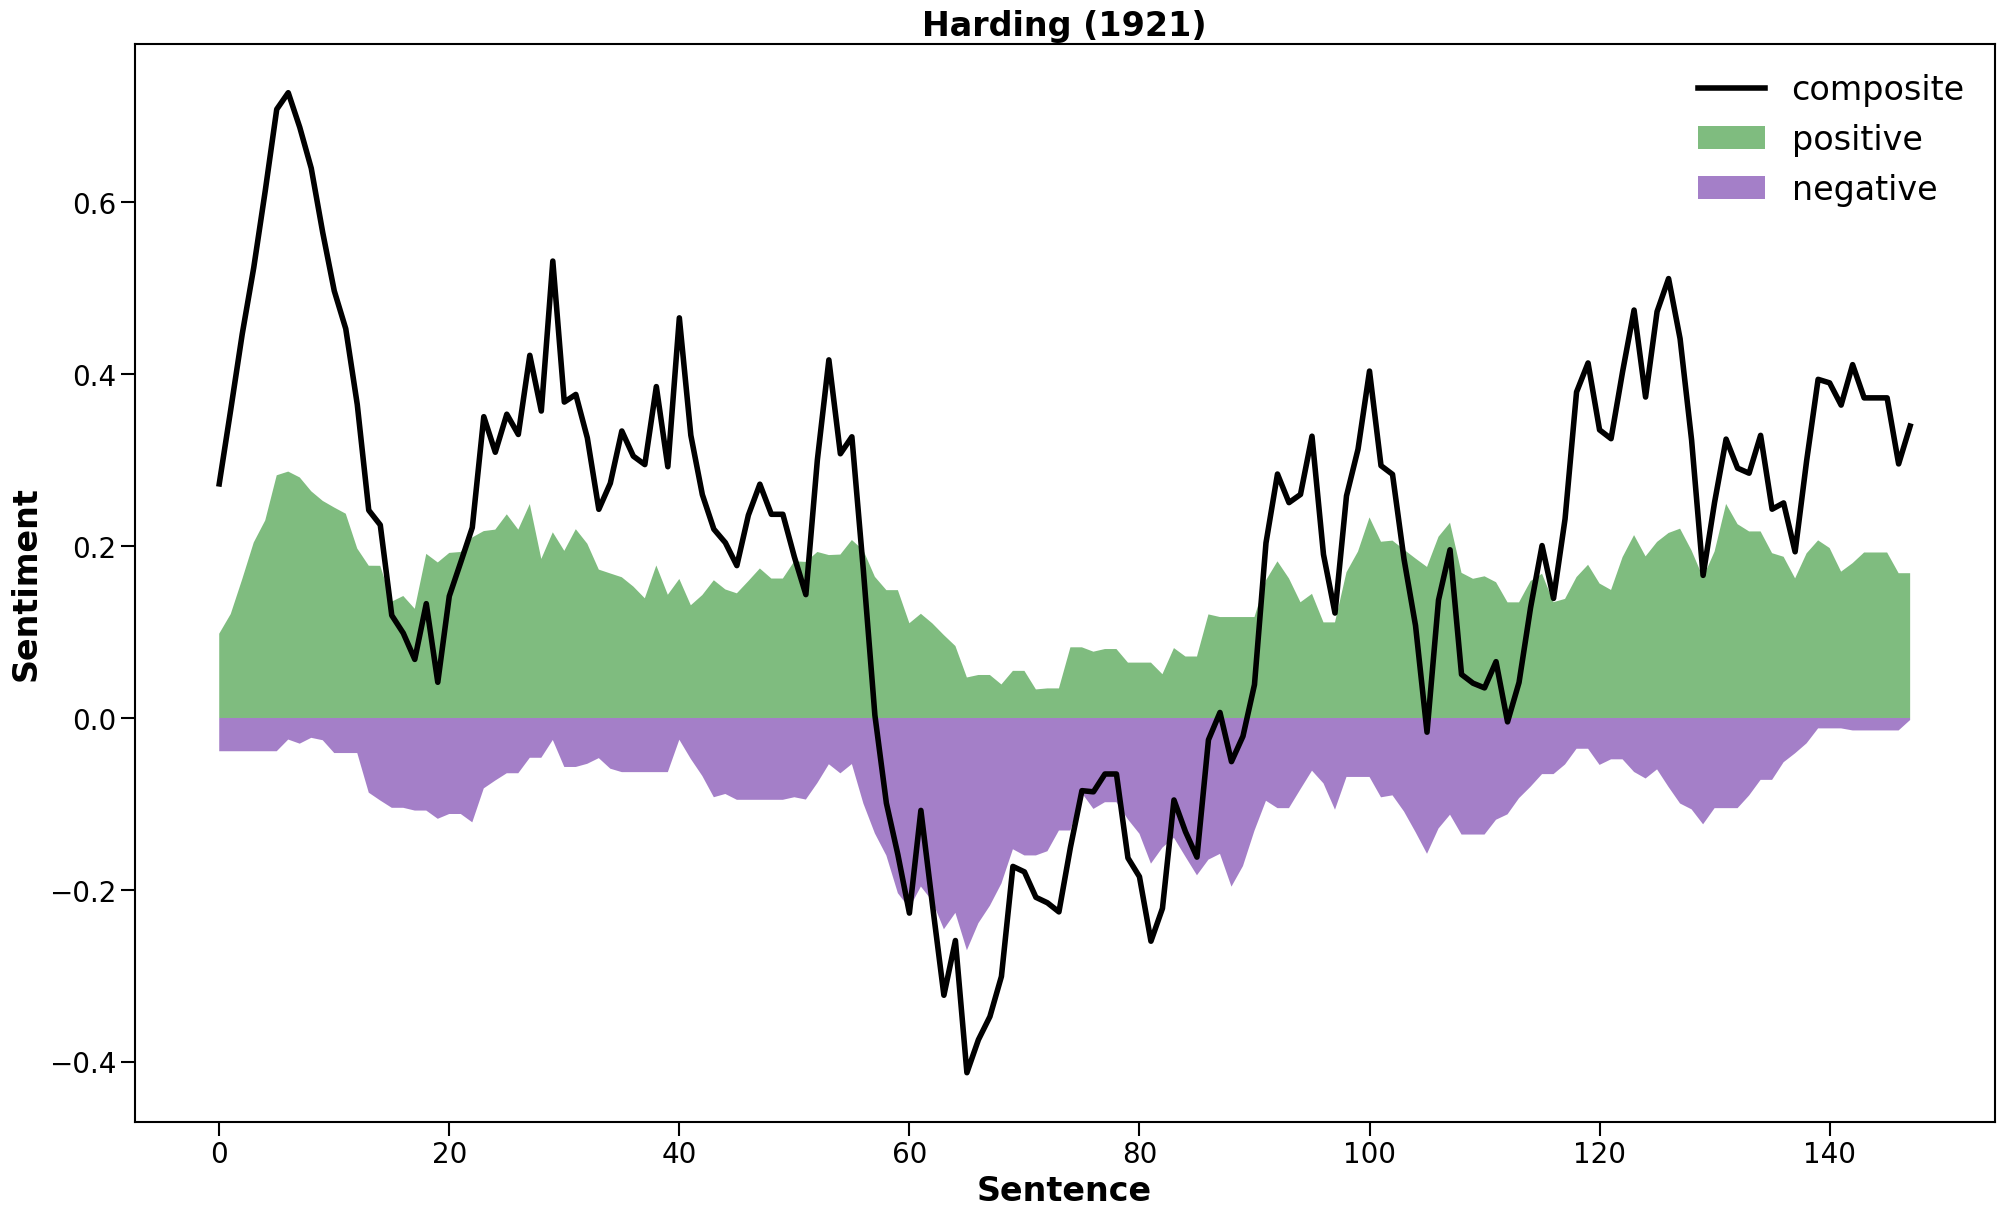

In [7]:
# plot specific speech
speech_idx = 33
comp = speech_scores[speech_idx]['comp']
neu = speech_scores[speech_idx]['neu']
pos = speech_scores[speech_idx]['pos']
neg = speech_scores[speech_idx]['neg']
neg = [-score for score in neg]

color1 = '#007a00'
color2 = '#4B0092'

# moving average function for smoothing 
def movingaverage(interval, window):
    window = np.ones(int(window))/float(window)
    return np.convolve(interval, window, 'same')

smoothing = 10
x = range(len(comp))
pos_smooth = movingaverage(pos,smoothing) # smoothed line for comparison 
neg_smooth = movingaverage(neg, smoothing)
comp_smooth = movingaverage(comp, smoothing)

# plot the  sentiment by sentence number
fig = plt.figure(figsize=(24,14))
ax = fig.gca()
plt.plot(pos_smooth, color=color1, linewidth=0)
plt.plot(neg_smooth, color=color2, linewidth=0)
plt.plot(comp_smooth, linewidth=4, label='composite', color='k', alpha=1)
plt.fill_between(x, pos_smooth, where=(np.array(pos_smooth) >= 0), facecolor=color1, alpha=0.5, interpolate=True, label='positive') # color if above or equal to 0
plt.fill_between(x, neg_smooth, where=(np.array(neg_smooth) < 0), facecolor=color2, alpha=0.5, interpolate=True, label='negative') # color if below 0

# formatting
plt.legend(loc='best', fontsize=24, edgecolor='black', framealpha=0).get_frame().set_linewidth(1.5)
plt.title('Harding (1921)', fontsize=24, weight='bold')
plt.xlabel('Sentence', fontsize=24, weight='bold')
plt.ylabel('Sentiment', fontsize=24, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=20, length =10, width=1.5)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

# Set the background of the plot (axes area) to transparent
ax.patch.set_alpha(0)

plt.savefig('Harding1921_trans_color_alt.png', dpi=600, transparent=True)

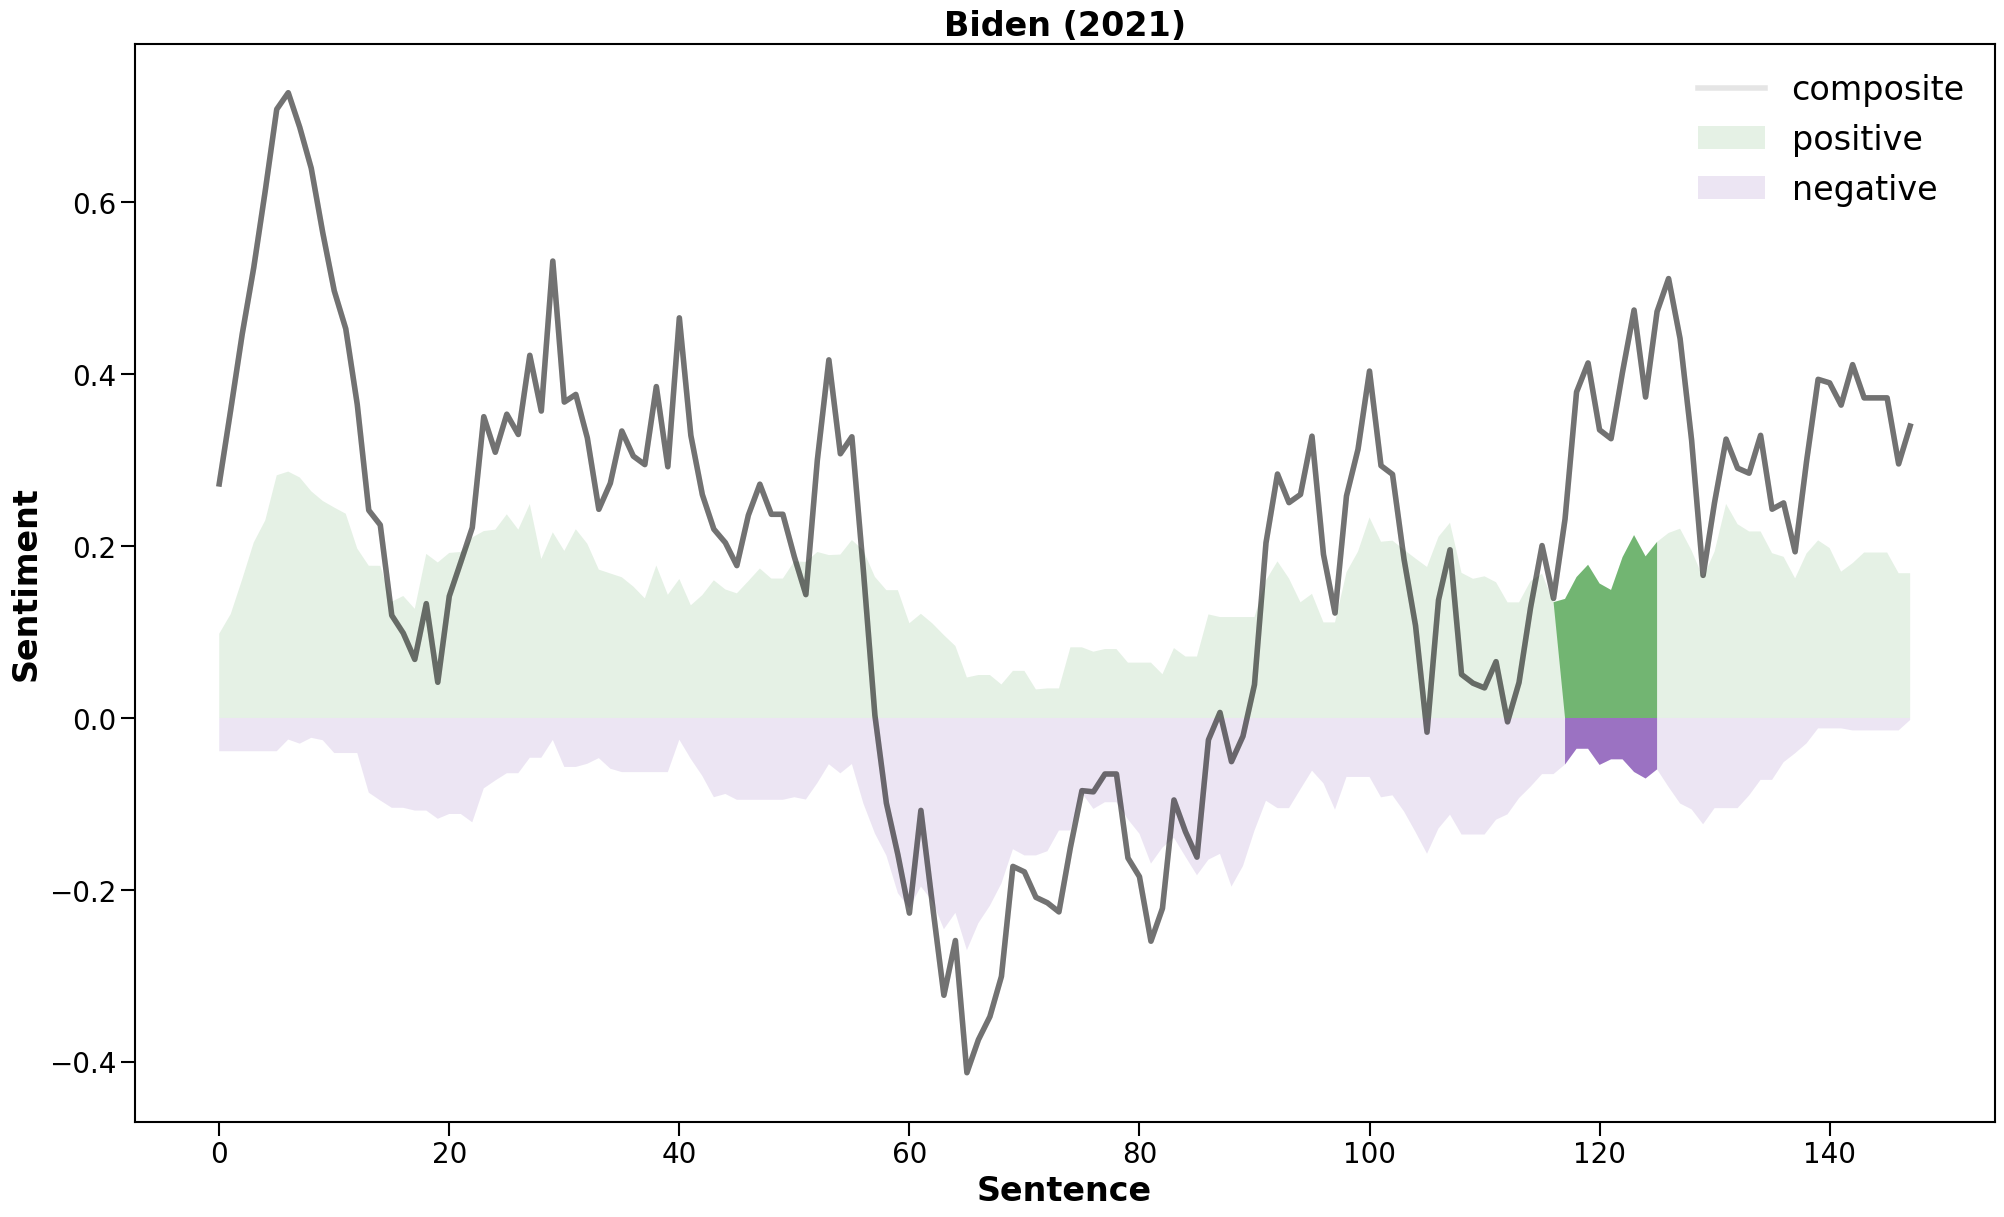

In [8]:
# code to generate plots with specific portions of the speech highlighted
highlight_range = range(117, 126)

# opacity levels for the highlight and non-highlight
alpha1 = 0.1
alpha2 = 0.5

# Plot the entire data with lower opacity
fig = plt.figure(figsize=(24,14))
ax = fig.gca()
plt.plot(pos_smooth, color=color1, linewidth=0, alpha=alpha1)
plt.plot(neg_smooth, color=color2, linewidth=0, alpha=alpha1)
plt.plot(comp_smooth, linewidth=4, label='composite', color='k', alpha=alpha1)

# Fill the areas with lower opacity for the entire range
plt.fill_between(x, pos_smooth, where=(np.array(pos_smooth) >= 0), facecolor=color1, alpha=alpha1, interpolate=True, label='positive')
plt.fill_between(x, neg_smooth, where=(np.array(neg_smooth) < 0), facecolor=color2, alpha=alpha1, interpolate=True, label='negative')

# Plot the specific range with higher opacity
plt.plot(pos_smooth, color=color1, linewidth=0, alpha=alpha1)
plt.plot(neg_smooth, color=color2, linewidth=0, alpha=alpha1)
plt.plot(comp_smooth, linewidth=4, color='k', alpha=alpha2)

# Fill the areas with higher opacity for the highlight range
plt.fill_between(x, pos_smooth, where=((np.array(pos_smooth) >= 0) & np.isin(x, highlight_range)), 
                 facecolor=color1, alpha=alpha2, interpolate=True)
plt.fill_between(x, neg_smooth, where=((np.array(neg_smooth) < 0) & np.isin(x, highlight_range)), 
                 facecolor=color2, alpha=alpha2, interpolate=True)

# Customizing the plot as in the original code
plt.legend(loc='best', fontsize=24, edgecolor='black', framealpha=0).get_frame().set_linewidth(1.5)
plt.title('Biden (2021)', fontsize=24, weight='bold')
plt.xlabel('Sentence', fontsize=24, weight='bold')
plt.ylabel('Sentiment', fontsize=24, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=20, length =10, width=1.5)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

# Set the background of the plot (axes area) to transparent
ax.patch.set_alpha(0)

plt.savefig('Biden2021_trans_highlighted1_altcolor.png', dpi=600, transparent=True)


In [9]:
# print specific speech by each sentence
i=0
for index, sent in enumerate(speech_scores[58]['text']):
    score = speech_scores[58]['comp'][index]
    print(f'[{str(index)}] {sent} [{score}]', end='\n\n')
    #print('['+str(i)+']'+' ' +sent, end='\n\n')

[0] chief justice roberts, vice president harris, speaker pelosi, leader schumer, leader mcconnell, vice president pence, distinguished guests, and my fellow americans. [0.5267]

[1] this is america’s day. [0.0]

[2] this is democracy’s day. [0.0]

[3] a day of history and hope. [0.4404]

[4] of renewal and resolve. [0.3818]

[5] through a crucible for the ages america has been tested anew and america has risen to the challenge. [0.0772]

[6] today, we celebrate the triumph not of a candidate, but of a cause, the cause of democracy. [0.5267]

[7] the will of the people has been heard and the will of the people has been heeded. [0.0]

[8] we have learned again that democracy is precious. [0.5719]

[9] democracy is fragile. [0.0]

[10] and at this hour, my friends, democracy has prevailed. [0.4767]

[11] so now, on this hallowed ground where just days ago violence sought to shake this capitol’s very foundation, we come together as one nation, under god, indivisible, to carry out the peac

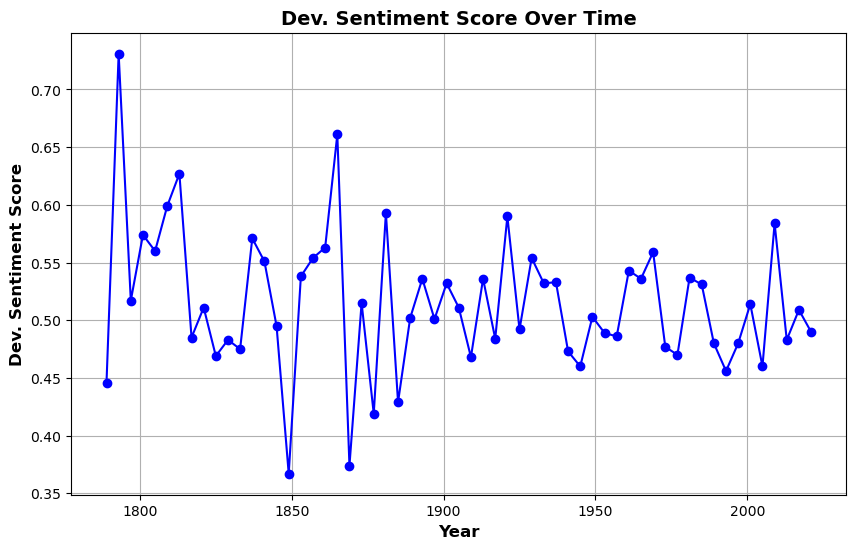

In [10]:
# plots of summary stats of all speeches
# convert the 'Date' column to datetime
speeches['Date'] = pd.to_datetime(speeches['Date'])

# extract the year from the 'Date' column
speeches['Year'] = speeches['Date'].dt.year

# plot mean_score over the years
plt.figure(figsize=(10, 6))
plt.plot(speeches['Year'], speeches['dev_score'], marker='o', linestyle='-', color='b')

# adding labels and title
plt.title('Dev. Sentiment Score Over Time', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12, weight='bold')
plt.ylabel('Dev. Sentiment Score', fontsize=12, weight='bold')

plt.grid(True)
plt.show()

In [12]:
def get_top_vader_sentiment_words(sentences, n=10):
    # Initialize counters for positive and negative words
    positive_words = []
    negative_words = []
    word_tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    # Analyze sentiment of each sentence using VADER
    for sent in sentences:
        sentiment_score = sia.polarity_scores(sent)
        # Tokenize the sentence into words
        words = word_tokenizer.tokenize(sent)
        # Filter out stopwords and punctuation
        filtered_words = [word for word in words if word.lower() not in stopwords]
        # If the sentence is positive or negative, categorize the words accordingly
        if sentiment_score['compound'] > 0.1:  # Positive sentence threshold
            positive_words.extend(filtered_words)
        elif sentiment_score['compound'] < -0.1:  # Negative sentence threshold
            negative_words.extend(filtered_words)
    # Count frequency of positive and negative words
    positive_word_counts = Counter(positive_words)
    negative_word_counts = Counter(negative_words)
    # Get the top 'n' positive and negative words by frequency
    top_positive = positive_word_counts.most_common(n)
    top_negative = negative_word_counts.most_common(n)
    return top_positive, top_negative
    
# Example usage: Pass the list of sentences from Warren's speech
Biden_speech = speeches.iloc[58]['Speech']
Biden_sent = nltk.tokenize.sent_tokenize(speeches.iloc[58]['Speech'])
top_positive, top_negative = get_top_vader_sentiment_words(Biden_sent, n=10)
print("Top 10 Positive Words:", top_positive)
print("Top 10 Negative Words:", top_negative)

Top 10 Positive Words: [('america', 10), ('nation', 6), ('way', 5), ('know', 5), ('people', 5), ('children', 5), ('us', 5), ('justice', 4), ('americans', 4), ('democracy', 4)]
Top 10 Negative Words: [('war', 7), ('us', 5), ('nation', 4), ('violence', 3), ('one', 3), ('forward', 3), ('lost', 3), ('must', 3), ('face', 3), ('ground', 2)]
